In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import pandas.util.testing as tm

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Read the data
data=pd.read_csv("/content/drive/My Drive/DOS_UDP.csv")

In [6]:
#Making a copy of data
data=data.copy()

#Feature Engineering

1. Understanding Data

In [7]:
#checking the missing values
data.isnull().sum()

pkSeqID              0
proto                0
saddr                0
sport                0
daddr                0
dport                0
seq                  0
stddev               0
N_IN_Conn_P_SrcIP    0
min                  0
state_number         0
mean                 0
N_IN_Conn_P_DstIP    0
drate                0
srate                0
max                  0
attack               0
category             0
subcategory          0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295188 entries, 0 to 295187
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pkSeqID            295188 non-null  int64  
 1   proto              295188 non-null  object 
 2   saddr              295188 non-null  object 
 3   sport              295188 non-null  int64  
 4   daddr              295188 non-null  object 
 5   dport              295188 non-null  int64  
 6   seq                295188 non-null  int64  
 7   stddev             295188 non-null  float64
 8   N_IN_Conn_P_SrcIP  295188 non-null  int64  
 9   min                295188 non-null  float64
 10  state_number       295188 non-null  int64  
 11  mean               295188 non-null  float64
 12  N_IN_Conn_P_DstIP  295188 non-null  int64  
 13  drate              295188 non-null  float64
 14  srate              295188 non-null  float64
 15  max                295188 non-null  float64
 16  at

In [9]:
data.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,1240757,udp,192.168.100.150,48719,192.168.100.3,80,99168,1.823185,63,0.000000,4,3.222832,63,0.0,0.461435,4.942302,1,DoS,UDP
1,787741,udp,192.168.100.149,33530,192.168.100.5,80,170464,2.113912,100,0.000000,4,2.112801,100,0.0,0.209328,4.322539,1,DoS,UDP
2,1429027,udp,192.168.100.148,108,192.168.100.6,80,25284,0.028597,100,4.002665,4,4.046831,100,0.0,0.247826,4.082324,1,DoS,UDP
3,1479476,udp,192.168.100.149,38264,192.168.100.5,80,75733,0.126301,100,3.258537,4,3.375540,100,0.0,0.282681,3.580228,1,DoS,UDP
4,909045,udp,192.168.100.148,10365,192.168.100.6,80,29611,1.432325,90,0.000000,4,2.864638,90,0.0,0.280290,3.586937,1,DoS,UDP


In [10]:
data['proto'].unique()

array(['udp', 'tcp', 'arp', 'ipv6-icmp'], dtype=object)

In [11]:
data['saddr'].unique()

array(['192.168.100.150', '192.168.100.149', '192.168.100.148',
       '192.168.100.147', '192.168.100.5', '192.168.100.3',
       '192.168.100.27', 'fe80::250:56ff:febe:254',
       'fe80::250:56ff:febe:e9d9', '192.168.100.46',
       'fe80::250:56ff:febe:26db', '192.168.100.1', '192.168.100.6',
       'fe80::250:56ff:febe:89ee', '192.168.100.4', '192.168.100.7'],
      dtype=object)

In [12]:
data['daddr'].unique()

array(['192.168.100.3', '192.168.100.5', '192.168.100.6', '192.168.100.7',
       '192.168.217.2', '192.168.100.55', '255.255.255.255', '96.7.49.66',
       '205.251.197.206', '192.168.100.1', '205.251.194.201',
       '224.0.0.251', '205.251.196.32', '52.201.147.106', '192.5.5.241',
       '192.55.83.30', '192.31.80.30', '8.8.8.8', '13.55.154.73',
       'ff02::2', '192.41.162.30', '129.250.35.250', 'ff02::fb',
       '27.124.125.250', '199.19.56.1', '192.33.14.30', '205.251.199.148',
       '192.58.128.30', '192.12.94.30', '205.251.196.160',
       '205.251.199.194', '192.36.148.17', '184.85.248.65', '192.33.4.12',
       '52.11.124.117', '192.168.100.255', '192.54.112.30', 'ff02::1',
       '172.217.25.170', '192.168.100.148', '205.251.194.102',
       '192.112.36.4', '205.251.194.86', '192.168.100.27',
       '192.52.178.30', '205.251.195.59', '52.35.35.13'], dtype=object)

In [13]:
data.describe()

,pkSeqID,sport,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack
count,2.951880e+05,295188.000000,295188.000000,295188.000000,295188.000000,295188.000000,295188.000000,295188.000000,295188.000000,295188.000000,295188.000000,295188.000000,295188.000000,295188.00000
mean,1.134484e+06,32730.124781,80.368643,128952.088876,1.227157,84.916104,1.160165,3.999526,3.032434,84.910589,0.007588,3.705250,4.088931,0.99960
std,3.020110e+05,19035.453452,49.059054,74743.668757,0.745898,22.997154,1.680366,0.036438,0.821567,23.010391,4.010274,1840.562405,0.631001,0.01999
min,6.172860e+05,-1.000000,-1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000
25%,8.755530e+05,16145.000000,80.000000,64174.750000,0.456314,74.000000,0.000000,4.000000,2.381333,74.000000,0.000000,0.230914,3.655815,1.00000
50%,1.134374e+06,32750.000000,80.000000,128785.500000,1.577425,100.000000,0.000000,4.000000,3.040930,100.000000,0.000000,0.279815,4.132957,1.00000
75%,1.391749e+06,49392.000000,80.000000,193329.250000,1.790869,100.000000,3.048082,4.000000,3.584404,100.000000,0.000000,0.404198,4.618028,1.00000
max,3.577360e+06,65535.000000,8883.000000,262167.000000,2.272045,100.000000,4.950444,8.000000,4.966808,100.000000,2178.649170,1000000.000000,4.999998,1.00000


In [14]:
#Removing the unwanted coloumns
col=['saddr','daddr','category','subcategory']
data=data.drop(columns=col,axis=1)

In [15]:
#Removing the dublicate values
data.drop_duplicates(keep='first',inplace=True)

2. Exploratory Data Analysis

In [16]:
data.head()

,pkSeqID,proto,sport,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack
0,1240757,udp,48719,80,99168,1.823185,63,0.000000,4,3.222832,63,0.0,0.461435,4.942302,1
1,787741,udp,33530,80,170464,2.113912,100,0.000000,4,2.112801,100,0.0,0.209328,4.322539,1
2,1429027,udp,108,80,25284,0.028597,100,4.002665,4,4.046831,100,0.0,0.247826,4.082324,1
3,1479476,udp,38264,80,75733,0.126301,100,3.258537,4,3.375540,100,0.0,0.282681,3.580228,1
4,909045,udp,10365,80,29611,1.432325,90,0.000000,4,2.864638,90,0.0,0.280290,3.586937,1


In [17]:
#Frequency of each category
data['proto'].value_counts()

udp          295155
arp              17
tcp              13
ipv6-icmp         3
Name: proto, dtype: int64

In [18]:
#relationship between the independent variables
data.corr()

,pkSeqID,sport,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack
pkSeqID,1.000000,0.035544,0.061090,0.208882,-0.048077,0.018522,0.111363,-0.094730,0.136154,0.016573,0.015303,0.014901,0.179332,-0.161739
sport,0.035544,1.000000,-0.000187,0.152336,-0.093065,-0.044963,0.094758,0.001270,0.042872,-0.045032,0.002463,0.002444,0.002791,-0.000864
dport,0.061090,-0.000187,1.000000,-0.012569,-0.010046,-0.024068,-0.004910,-0.081891,-0.018080,-0.024936,0.001870,-0.000958,-0.034629,-0.377717
seq,0.208882,0.152336,-0.012569,1.000000,-0.086040,0.032481,0.146002,0.016927,0.027345,0.032867,-0.003128,-0.003055,0.084401,0.032363
stddev,-0.048077,-0.093065,-0.010046,-0.086040,1.000000,-0.017884,-0.938780,0.020679,-0.572633,-0.017489,-0.003105,-0.003037,0.237062,0.031995
N_IN_Conn_P_SrcIP,0.018522,-0.044963,-0.024068,0.032481,-0.017884,1.000000,0.017706,0.030362,0.018438,0.999653,-0.005993,-0.005838,-0.004789,0.054681
min,0.111363,0.094758,-0.004910,0.146002,-0.938780,0.017706,1.000000,0.006320,0.696400,0.017838,-0.001121,-0.001105,0.049219,0.010034
state_number,-0.094730,0.001270,-0.081891,0.016927,0.020679,0.030362,0.006320,1.000000,0.038314,0.042365,-0.100697,-0.101039,0.071387,0.585757
mean,0.136154,0.042872,-0.018080,0.027345,-0.572633,0.018438,0.696400,0.038314,1.000000,0.019230,-0.006520,-0.006442,0.509939,0.061811
N_IN_Conn_P_DstIP,0.016573,-0.045032,-0.024936,0.032867,-0.017489,0.999653,0.017838,0.042365,0.019230,1.000000,-0.005852,-0.005674,-0.003349,0.066635


In [19]:
#Cross tables and data visualization
#Extracting the coloumn names
data.columns

Index(['pkSeqID', 'proto', 'sport', 'dport', 'seq', 'stddev',
       'N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'N_IN_Conn_P_DstIP',
       'drate', 'srate', 'max', 'attack'],
      dtype='object')

In [20]:
#proto proportion table
pd.crosstab(index=data['proto'],columns='count',normalize=True)

col_0,count
proto,
arp,0.000058
ipv6-icmp,0.000010
tcp,0.000044
udp,0.999888


In [21]:
#proto vs attack
pd.crosstab(index=data['proto'],columns=data['attack'],normalize=True)

attack,0,1
proto,,
arp,0.000034,0.000024
ipv6-icmp,0.000010,0.000000
tcp,0.000044,0.000000
udp,0.000312,0.999577


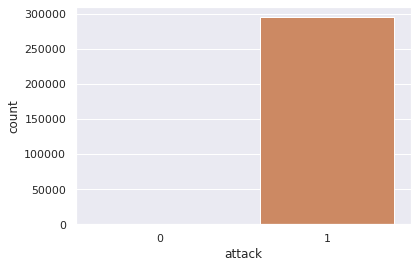

In [22]:
#frequency distribution of attack
sns.countplot(data['attack'])

In [23]:
data=data.drop(columns='pkSeqID')

In [24]:
#Categorical Encoding
data=pd.get_dummies(data)

In [25]:
data.head()

,sport,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,proto_arp,proto_ipv6-icmp,proto_tcp,proto_udp
0,48719,80,99168,1.823185,63,0.000000,4,3.222832,63,0.0,0.461435,4.942302,1,0,0,0,1
1,33530,80,170464,2.113912,100,0.000000,4,2.112801,100,0.0,0.209328,4.322539,1,0,0,0,1
2,108,80,25284,0.028597,100,4.002665,4,4.046831,100,0.0,0.247826,4.082324,1,0,0,0,1
3,38264,80,75733,0.126301,100,3.258537,4,3.375540,100,0.0,0.282681,3.580228,1,0,0,0,1
4,10365,80,29611,1.432325,90,0.000000,4,2.864638,90,0.0,0.280290,3.586937,1,0,0,0,1


In [26]:
#Seperating the features and target variable
y=data['attack']
x=data.drop(columns='attack')

In [27]:
data.shape

(295188, 17)

In [28]:
x.shape

(295188, 16)

In [29]:
y.shape

(295188,)

In [30]:
#Balancing the target variable
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state = 0)
x, y = smk.fit_sample(x,y)

In [31]:
x.shape

(590140, 16)

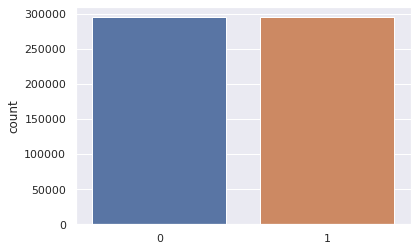

In [32]:
sns.countplot(y)

In [33]:
#Spliting dataset into Train and Test set 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [34]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
clf=GaussianNB()
clf.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [36]:
#Checking the accuracy of model
from sklearn.metrics import accuracy_score
y_pred=clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(" Testing Accuracy: %.2f%%" % (accuracy * 100.0))
scores = cross_val_score(clf, x_train, y_train, cv=10)
print("Cross Validation Accuracy: %.2f%% " % (scores.mean()*100))

 Testing Accuracy: 100.00%
Cross Validation Accuracy: 100.00% 


Text(0.5, 1.0, 'Naive Bayes Classifier')

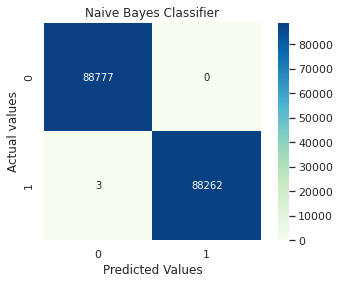

In [37]:
#confusion matrix
from sklearn.metrics import confusion_matrix
con = confusion_matrix(y_test,y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
axes = sns.heatmap(con, square=True,annot=True,fmt='d',cbar = True, cmap = plt.cm.GnBu)
ax = plt.axes()
plt.xlabel('Predicted Values')
plt.ylabel('Actual values')
ax.set_title('Naive Bayes Classifier')

In [38]:
from sklearn.metrics import classification_report
print('Naive Bayes Classifier')
print(classification_report(y_test, y_pred))

Naive Bayes Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     88777
           1       1.00      1.00      1.00     88265

    accuracy                           1.00    177042
   macro avg       1.00      1.00      1.00    177042
weighted avg       1.00      1.00      1.00    177042



In [39]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.9999830057214072

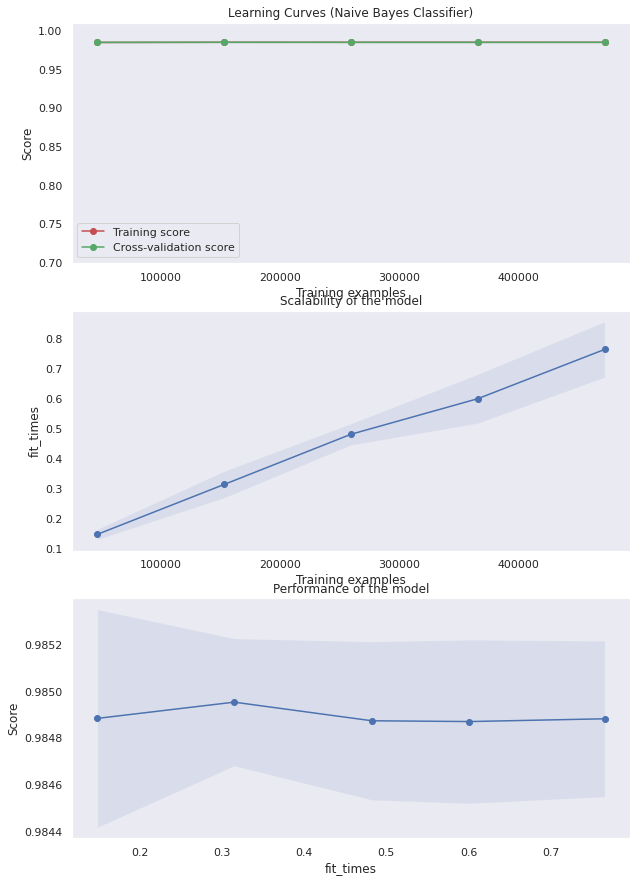

In [41]:
#from sklearn.model_selection import learning_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, x, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
   
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, x, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")


fig, axes = plt.subplots(3, 1, figsize=(10, 15))

title = "Learning Curves (Naive Bayes Classifier)"
# Cross validation with 10 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, x, y,axes=axes[:,], cv=cv, ylim=(0.7, 1.01), n_jobs=4)

plt.show()